<a href="https://colab.research.google.com/github/saurabhaloneai/Pytorch-complete/blob/main/01_pytorch_workflow_day_1_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple PyTorch Work - Flow ##

In [88]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__


'2.1.0+cu118'

cuda cheack :

1. torch.cuda.is_available()
2. torch.version.cuda
3. torch.cuda.current_device()
4. cuda_id = torch.cuda.current_device()
4. torch.cuda.get_device_name(cuda id)


In [89]:
# Setup device-agnostic code

print(f"Is CUDA supported by this system?{torch.cuda.is_available()}")

print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system?True
CUDA version: 11.8
ID of current CUDA device: 0
Name of current CUDA device: Tesla T4


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [90]:
# Create the data parameters

weights = 0.5
bias = 0.9
start = 0
step = 0.05
end = 2
X = torch.arange(start,end,step).unsqueeze(dim=1)


# Make X and y using linear regression feature

y  = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 40
Number of y samples: 40
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0500],
        [0.1000],
        [0.1500],
        [0.2000],
        [0.2500],
        [0.3000],
        [0.3500],
        [0.4000],
        [0.4500]])
y: tensor([[0.9000],
        [1.1500],
        [1.4000],
        [1.6500],
        [1.9000],
        [2.1500],
        [2.4000],
        [2.6500],
        [2.9000],
        [3.1500]])


In [91]:
# Split the data into training and testing

split = int(( 80 * 40 ) / 100)

X_train , y_train = X[:split], y[:split]

X_test , y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(32, 32, 8, 8)

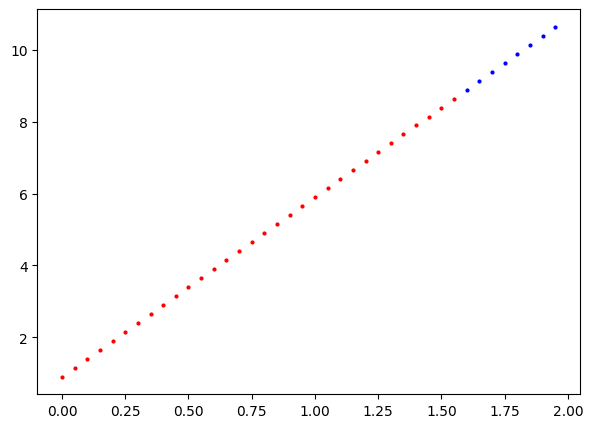

In [92]:
# Plot the training and testing data

def plot(train_data = X_train , train_label = y_train , test_data = X_test, test_label = y_test , predictions = None):

  plt.figure(figsize=(7,5))

  plt.scatter(train_data, train_label,s = 4, c='r',label ="Training data ")
  plt.scatter(test_data, test_label,s = 4, c='b',label = "testing data")

  if predictions is not None:
    plt.scatter(test_data , predictions, s = 4, c='g')



plot()


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [93]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module):

  def __init__(self):

    super().__init__()

    self.weights = nn.Parameter(torch.rand(1,requires_grad = True , dtype=torch.float))

    self.bias = nn.Parameter(torch.rand(1,requires_grad = True, dtype = torch.float))


  def forward(self,x:torch.tensor) -> torch.Tensor:

     return self.weights * x +  self.bias #you can use Cap X but small x is a good practice don't know who tell



In [94]:
# Instantiate the model and put it to the target device

model_1 = LinearRegressionModel()

list(model_1.parameters())


[Parameter containing:
 tensor([0.6342], requires_grad=True),
 Parameter containing:
 tensor([0.2533], requires_grad=True)]

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [95]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

## optimize r
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


In [96]:
# Training loop

train_loss = []
test_loss = []
epoch_count = []

# Train model for 300 epochs

epochs  = 300


# Send data to target device


for epoch in range(epochs):
  ### Training

  # Put model in train mode

  model_1.train()

  # 1. Forward pass

  y_pred = model_1(X_train)

  # 2. Calculate loss

  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients

  optimizer.zero_grad()

  # 4. Backpropagation

  loss.backward()


  # 5. Step the optimizer

  optimizer.step()

  # Put model in evaluation mode and setup inference context

      # 1. Forward pass


  with torch.inference_mode():

    y_test_preds = model_1(X_test)


    # 2. Calculate test loss

    test_losss = loss_fn(y_test_preds,y_test)



  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    epoch_count.append(epoch)

    train_loss.append(loss)

    test_loss.append(test_losss)

      # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_losss:.3f}")

Epoch: 0 | Train loss: 4.030 | Test loss: 8.372
Epoch: 20 | Train loss: 3.710 | Test loss: 7.897
Epoch: 40 | Train loss: 3.390 | Test loss: 7.422
Epoch: 60 | Train loss: 3.070 | Test loss: 6.947
Epoch: 80 | Train loss: 2.768 | Test loss: 6.482
Epoch: 100 | Train loss: 2.490 | Test loss: 6.030
Epoch: 120 | Train loss: 2.236 | Test loss: 5.594
Epoch: 140 | Train loss: 2.006 | Test loss: 5.173
Epoch: 160 | Train loss: 1.798 | Test loss: 4.770
Epoch: 180 | Train loss: 1.614 | Test loss: 4.388
Epoch: 200 | Train loss: 1.452 | Test loss: 4.026
Epoch: 220 | Train loss: 1.310 | Test loss: 3.687
Epoch: 240 | Train loss: 1.189 | Test loss: 3.371
Epoch: 260 | Train loss: 1.085 | Test loss: 3.079
Epoch: 280 | Train loss: 0.999 | Test loss: 2.812


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [97]:
model_1.state_dict()

OrderedDict([('weights', tensor([2.7721])), ('bias', tensor([2.2727]))])

In [98]:
X_test

tensor([[1.6000],
        [1.6500],
        [1.7000],
        [1.7500],
        [1.8000],
        [1.8500],
        [1.9000],
        [1.9500]])

In [99]:
y_new_preds,y_test

(tensor([[ 8.8979],
         [ 9.1481],
         [ 9.3983],
         [ 9.6486],
         [ 9.8988],
         [10.1490],
         [10.3992],
         [10.6494]]),
 tensor([[ 8.9000],
         [ 9.1500],
         [ 9.4000],
         [ 9.6500],
         [ 9.9000],
         [10.1500],
         [10.4000],
         [10.6500]]))

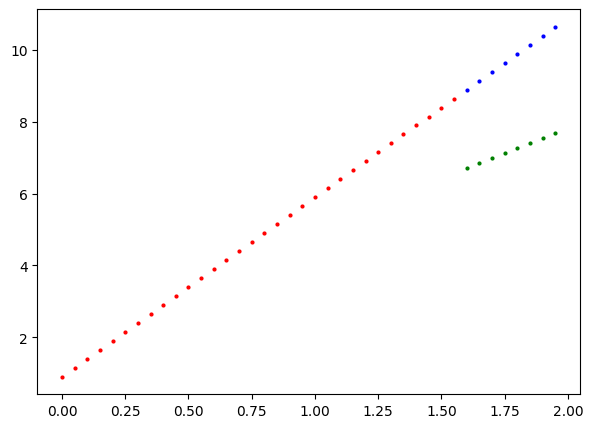

In [100]:
# Make predictions with the model

with torch.inference_mode() :
  y_new_preds = model_1(X_test)

plot(predictions = y_new_preds)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
PATH = "/bin/aa/model_1"

In [103]:
from pathlib import Path

#model directory

MODEL_PATH   = Path("/content/drive/MyDrive/models")


# 1. Create models directory


MODEL_PATH.mkdir(parents = True , exist_ok = True)

# 2. Create model save path

MODEL_NAME  = "model_1.pth"

# 3. Save the model state dict

model_save_path = MODEL_PATH / MODEL_NAME

model_save_path



PosixPath('/content/drive/MyDrive/models/model_1.pth')

In [106]:
PATH = "/content/sample_data/model_1"

torch.save(model_1,PATH)

# loading

model = torch.load(PATH)

model.eval()

LinearRegressionModel()

In [110]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

#save
torch.save(model_1.state_dict(), PATH)


#load

model = LinearRegressionModel()
model.load_state_dict(torch.load(PATH))
model.eval()



LinearRegressionModel()

In [113]:
# Make predictions with loaded model and compare them to the previous
model_1(1000),model(1000)

(tensor([2774.4111], grad_fn=<AddBackward0>),
 tensor([2774.4111], grad_fn=<AddBackward0>))

In [ ]:
##end